<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_moons

In [3]:
sns.set()
np.random.seed(42)

In [6]:
raw_data = make_moons(n_samples = 700, noise = 0.25, random_state = 42)
data = raw_data[0]
target = raw_data[1]

print(data[:5])
print(target[:5])

[[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]
[0 1 1 0 0]


In [7]:
df = pd.DataFrame(data = np.c_[data, target], columns = ['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [8]:
px.scatter(df, x = 'x1', y = 'x2', color = 'target', width = 700, height = 500)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

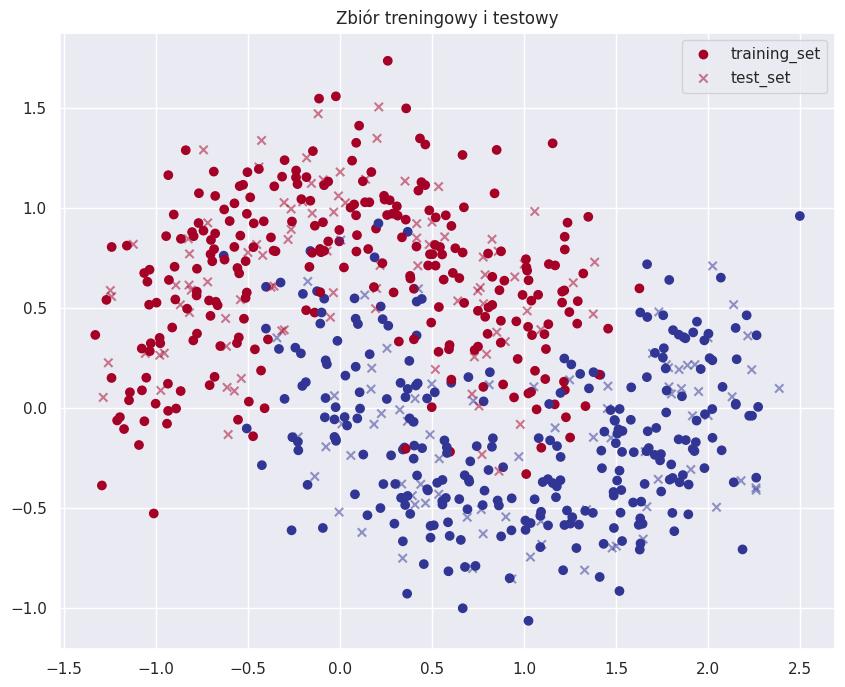

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'RdYlBu', marker = 'x', alpha = 0.5, label = 'test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Zbiór treningowy o dokładności: 0.9410')

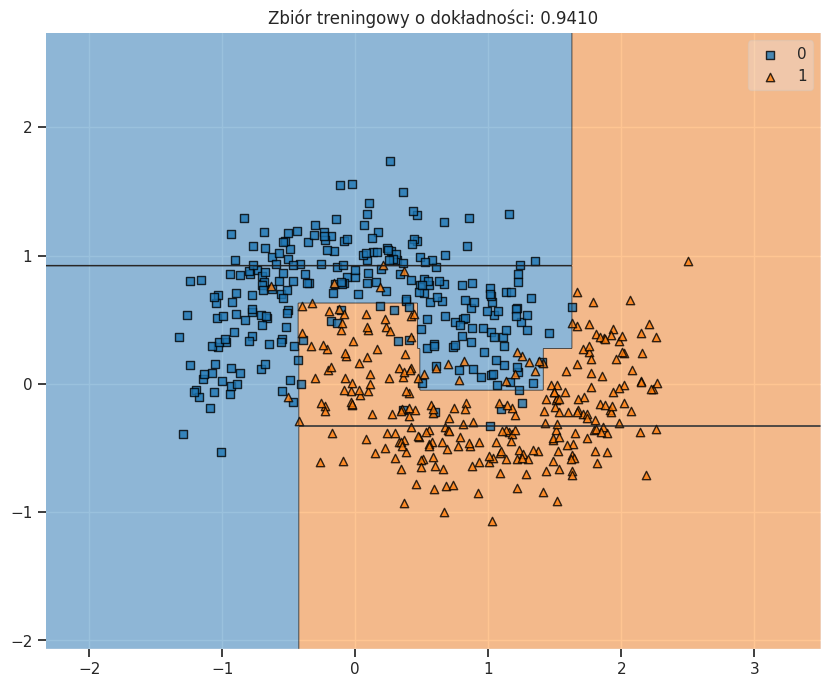

In [11]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy o dokładności: {classifier.score(X_train, y_train) :.4f}')

Text(0.5, 1.0, 'Zbiór testowy o dokładności: 0.8914')

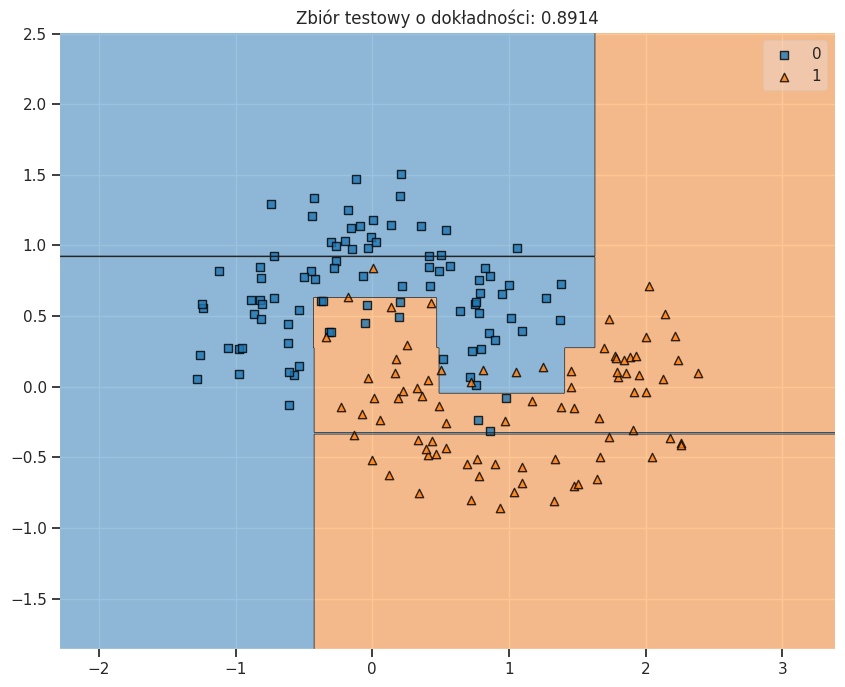

In [12]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy o dokładności: {classifier.score(X_test, y_test) :.4f}')

Walidacja_krzyżowa

In [13]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [14]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std() :.4f}) ')

Accuracy: 0.9200 (+/- 0.0359) 


In [16]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 15)
scores

array([0.85714286, 0.85714286, 0.91428571, 0.97142857, 0.91428571,
       0.91428571, 0.97142857, 0.91428571, 0.91428571, 0.97142857,
       0.88571429, 0.97142857, 0.94285714, 0.85714286, 0.85714286])

In [17]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std() :.4f}) ')

Accuracy: 0.9143 (+/- 0.0430) 


In [18]:
scores = pd.DataFrame(scores, columns= ['accuracy'])
scores

,accuracy
0,0.857143
1,0.857143
2,0.914286
3,0.971429
4,0.914286
5,0.914286
6,0.971429
7,0.914286
8,0.914286
9,0.971429


In [25]:
px.bar(scores, y = 'accuracy', color = 'accuracy', width = 800, height = 500,
       title = f'Walidacja krzyzowa (15 podziałow) | Accuracy: {scores.mean()[0]:.4f} (+/- {scores.std()[0] :.3f})',
       color_continuous_scale = px.colors.sequential.Inferno_r, range_color = [scores.min()[0] - 0.01, 1.0])

/tmp/ipython-input-3594972654.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-3594972654.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

